<a href="https://colab.research.google.com/github/NutrientC/cs-145-project/blob/main/cs-145-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Mushroom DataSet Prep


In [ ]:
#must add shortcut for folder to appear in drive, add folder shortcut to root of drive
mushroom_data = pd.read_csv('/content/drive/MyDrive/CS145 Final Project Folder/mushroom_train.csv', delimiter=';')
mushroom_test = pd.read_csv('/content/drive/MyDrive/CS145 Final Project Folder/mushroom_test.csv', delimiter=';')


In [ ]:
# Splitting Data into Features and Labels
mushroom_train_label = mushroom_data["class"]
mushroom_train_data = mushroom_data.drop("class", axis=1)
mushroom_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50213 entries, 0 to 50212
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          50213 non-null  float64
 1   cap-shape             50213 non-null  object 
 2   cap-surface           37915 non-null  object 
 3   cap-color             50213 non-null  object 
 4   does-bruise-or-bleed  50213 non-null  object 
 5   gill-attachment       42447 non-null  object 
 6   gill-spacing          31064 non-null  object 
 7   gill-color            50213 non-null  object 
 8   stem-height           50213 non-null  float64
 9   stem-width            50213 non-null  float64
 10  stem-root             7413 non-null   object 
 11  stem-surface          19912 non-null  object 
 12  stem-color            50213 non-null  object 
 13  veil-type             3177 non-null   object 
 14  veil-color            6297 non-null   object 
 15  has-ring           

In [ ]:
# Splitting Test into Features and Labels
mushroom_test_label = mushroom_test["class"]
mushroom_test_data = mushroom_test.drop("class", axis=1)
mushroom_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10856 entries, 0 to 10855
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          10856 non-null  float64
 1   cap-shape             10856 non-null  object 
 2   cap-surface           9034 non-null   object 
 3   cap-color             10856 non-null  object 
 4   does-bruise-or-bleed  10856 non-null  object 
 5   gill-attachment       8738 non-null   object 
 6   gill-spacing          4942 non-null   object 
 7   gill-color            10856 non-null  object 
 8   stem-height           10856 non-null  float64
 9   stem-width            10856 non-null  float64
 10  stem-root             2118 non-null   object 
 11  stem-surface          3033 non-null   object 
 12  stem-color            10856 non-null  object 
 13  veil-type             0 non-null      float64
 14  veil-color            1116 non-null   object 
 15  has-ring           

Data Processing

In [ ]:
#dropping features with too many nulls
mushroom_train_data = mushroom_train_data.drop(columns=['stem-root', 'veil-type', 'veil-color', 'spore-print-color', 'stem-surface', "gill-spacing"])
mushroom_test_data = mushroom_test_data.drop(columns=['stem-root', 'veil-type', 'veil-color', 'spore-print-color', 'stem-surface', "gill-spacing"])


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer


# chose to onehot encode season because i did not want a ton of features which one inc the complexity since the other categorical features had about 5-10 value choices alteast.
numerical_features = ["cap-diameter", "stem-height", "stem-width"]
categorical_features1 = ['season']

categorical_features2 = ["has-ring", "does-bruise-or-bleed", 'cap-shape', 'cap-surface', 'cap-color', 'gill-color','ring-type', 'habitat','gill-attachment','stem-color']

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(categories='auto', handle_unknown='ignore'))
])


categorical_label_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label', OrdinalEncoder())
])

full_pipeline = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat1', categorical_transformer, categorical_features1),
    ('cat2', categorical_label_transformer, categorical_features2)])

mushroom_prepared_train = full_pipeline.fit_transform(mushroom_train_data)


In [ ]:
most_common_value_stem = mushroom_train_data['stem-color'].mode()[0]
mushroom_test_data['stem-color'] = mushroom_test_data['stem-color'].replace('f', most_common_value_stem)
mushroom_prepared_test = full_pipeline.transform(mushroom_test_data)

In [ ]:
from sklearn.preprocessing import LabelEncoder

class_mapping = {'p': 0, 'e': 1}
labelencoder = LabelEncoder()
mushroom_train_label_mapped = mushroom_train_label.map(class_mapping)
labelencoder.fit(mushroom_train_label_mapped)
mushroom_train_label = labelencoder.transform(mushroom_train_label_mapped)
print(mushroom_train_label)

[0 0 0 ... 0 0 0]


In [ ]:
labelencoderTest = LabelEncoder()
mushroom_test_label_mapped = mushroom_test_label.map(class_mapping)
labelencoder.fit(mushroom_test_label_mapped)
mushroom_test_label = labelencoder.transform(mushroom_test_label_mapped)
print(mushroom_test_label)

[0 0 0 ... 1 1 1]


## Mushroom Prepped Data:


*   mushroom_prepared_train
*   mushroom_train_label
*   mushroom_prepared_test
*   mushroom_test_label





## Titantic Data Prep

In [ ]:
titanic_data = pd.read_csv('/content/drive/MyDrive/CS145 Final Project Folder/Titanic_data.csv', delimiter=',')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']
split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
for train_index, test_index in split.split(X, y):
    Titanic_train_data, Titanic_test_data = X.iloc[train_index], X.iloc[test_index]
    Titanic_train_label, Titanic_test_label = y.iloc[train_index], y.iloc[test_index]

In [ ]:
Titanic_train_label = np.array(Titanic_train_label.values)

Titanic_test_label = np.array(Titanic_test_label.values)

In [ ]:
Titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 692 to 507
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        160 non-null    object 
 10  Embarked     710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [ ]:
Titanic_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 565 to 637
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Pclass       179 non-null    int64  
 2   Name         179 non-null    object 
 3   Sex          179 non-null    object 
 4   Age          139 non-null    float64
 5   SibSp        179 non-null    int64  
 6   Parch        179 non-null    int64  
 7   Ticket       179 non-null    object 
 8   Fare         179 non-null    float64
 9   Cabin        44 non-null     object 
 10  Embarked     179 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 16.8+ KB


In [ ]:
#dropping features with too many nulls or data with no pattern
Titanic_train_data = Titanic_train_data.drop(columns=['Cabin', 'Ticket', 'Name','PassengerId' ])
Titanic_test_data = Titanic_test_data.drop(columns=['Cabin', 'Ticket', 'Name','PassengerId'])

In [ ]:
Titanic_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 565 to 637
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    object 
 2   Age       139 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 11.2+ KB


In [ ]:
numerical_features = ["Age", "Fare"]
categorical_features1 = ['Pclass', 'Embarked', 'Sex' ]
categorical_features2 = ['Parch', 'SibSp']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(categories='auto', handle_unknown='ignore'))
])


categorical_label_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label', OrdinalEncoder())
])

full_pipeline = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat1', categorical_transformer, categorical_features1),
    ('cat2', categorical_label_transformer, categorical_features2)])

Titanic_prepared_train = full_pipeline.fit_transform(Titanic_train_data)


In [ ]:
Titanic_prepared_test = full_pipeline.transform(Titanic_test_data)

## Titanic Prepped Data:


*   Titanic_prepared_train
*   Titanic_train_label
*   Titanic_prepared_test
*   Titanic_test_label


# Selecting Best Features

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Apply SelectKBest class to extract top 10 best features
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(mushroom_prepared_train, mushroom_train_label)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(mushroom_train_data.columns)

# Concat two dataframes for better visualization
feature_scores = pd.concat([dfcolumns, dfscores],axis=1)
feature_scores.columns = ['Specs','Score']
print(feature_scores.nlargest(10,'Score'))

# Apply SelectKBest class to extract top 10 best features
best_features = SelectKBest(score_func=f_classif, k=10)
fit = best_features.fit(Titanic_prepared_train, Titanic_train_label)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Titanic_train_data.columns)

# Concat two dataframes for better visualization
feature_scores = pd.concat([dfcolumns, dfscores],axis=1)
feature_scores.columns = ['Specs','Score']
print(feature_scores.nlargest(10,'Score'))

                   Specs        Score
0           cap-diameter  1403.595102
6             gill-color  1170.820914
2            cap-surface   852.392155
4   does-bruise-or-bleed   413.080665
13                season   394.492257
3              cap-color   348.109308
1              cap-shape   324.345190
14                   NaN   320.829396
16                   NaN   216.118817
9             stem-color   209.966517
     Specs       Score
8      NaN  306.593249
9      NaN  306.593249
4    Parch   80.338627
2      Age   73.997276
1      Sex   58.314907
5     Fare   23.782248
7      NaN   23.546389
10     NaN    5.066904
3    SibSp    3.220261
0   Pclass    2.020032


# Logistic Regression


#### No Ensembling

######Mushroom Dataset

Optimization terminated successfully.
         Current function value: 0.629011
         Iterations 6
accuracy: 0.41147752394988946
precision: 0.46983485001685205
recall: 0.22447665056360708
f1_score: 0.30380298572518255


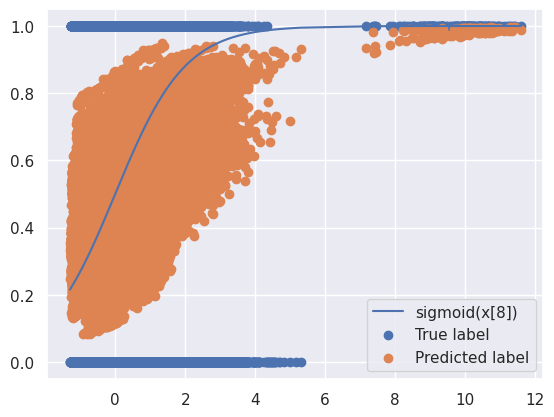

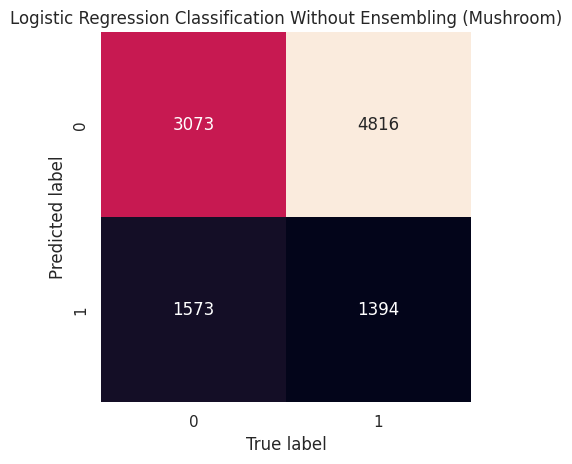

In [ ]:
#@title
import statsmodels.api as sm
model = sm.Logit(mushroom_train_label, mushroom_prepared_train).fit()
predictions = model.predict(mushroom_prepared_test)
predictions = np.where(predictions > 0.5, 1, 0)
accuracy = metrics.accuracy_score(mushroom_test_label, predictions)
precision = metrics.precision_score(mushroom_test_label, predictions)
recall = metrics.recall_score(mushroom_test_label, predictions)
f1_score = metrics.f1_score(mushroom_test_label, predictions)
print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1_score: {}".format(f1_score))

# Visualization
probs = model.predict(mushroom_prepared_train)
best_feature = np.sort(mushroom_prepared_train[:, 0])
plt.plot(best_feature, 1/(1 + np.exp(-best_feature)), label='sigmoid(x[8])')
plt.scatter(mushroom_prepared_train[:, 0], mushroom_train_label, label='True label')
plt.scatter(mushroom_prepared_train[:, 0], probs, label='Predicted label')
plt.legend()
plt.show()

# Heatmap
mat = confusion_matrix(mushroom_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Logistic Regression Classification Without Ensembling (Mushroom)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()

######Titanic Dataset

Optimization terminated successfully.
         Current function value: 0.438590
         Iterations 6
accuracy: 0.8044692737430168
precision: 0.7833333333333333
recall: 0.6811594202898551
f1_score: 0.7286821705426356


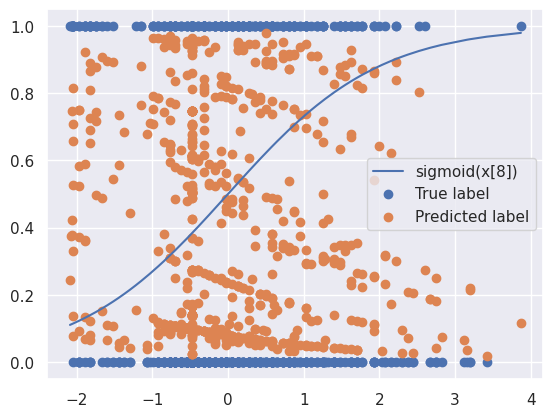

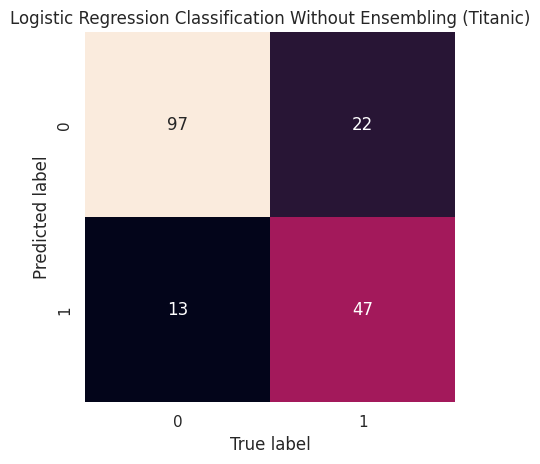

In [ ]:
model = sm.Logit(Titanic_train_label, Titanic_prepared_train).fit()
predictions = model.predict(Titanic_prepared_test)
predictions = np.where(predictions > 0.5, 1, 0)
accuracy = metrics.accuracy_score(Titanic_test_label, predictions)
precision = metrics.precision_score(Titanic_test_label, predictions)
recall = metrics.recall_score(Titanic_test_label, predictions)
f1_score = metrics.f1_score(Titanic_test_label, predictions)
print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1_score: {}".format(f1_score))

# Visualization
probs = model.predict(Titanic_prepared_train)
best_feature = np.sort(Titanic_prepared_train[:, 0])
plt.plot(best_feature, 1/(1 + np.exp(-best_feature)), label='sigmoid(x[8])')
plt.scatter(Titanic_prepared_train[:, 0], Titanic_train_label, label='True label')
plt.scatter(Titanic_prepared_train[:, 0], probs, label='Predicted label')
plt.legend()
plt.show()

# Heatmap
mat = confusion_matrix(Titanic_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Logistic Regression Classification Without Ensembling (Titanic)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()

####Ensembling

######Mushroom Dataset

Manual ensembling results: 
accuracy: 0.4110169491525424
precision: 0.4690444145356662
recall: 0.22447665056360708
f1_score: 0.30363755173164886


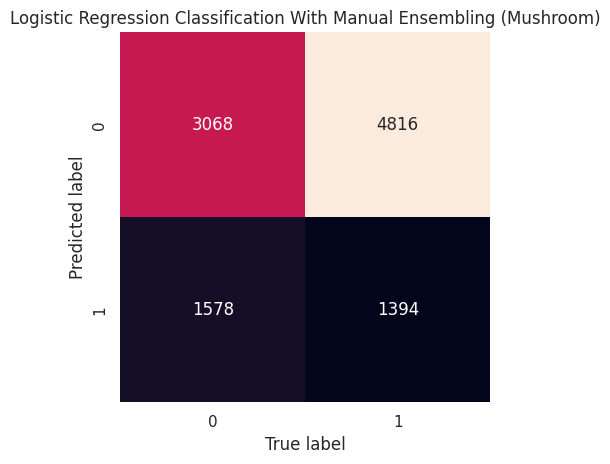

Bagging Classifier ensembling results: 
accuracy: 0.41239867354458365
precision: 0.47163477677072846
recall: 0.22624798711755234
f1_score: 0.3058004135379258


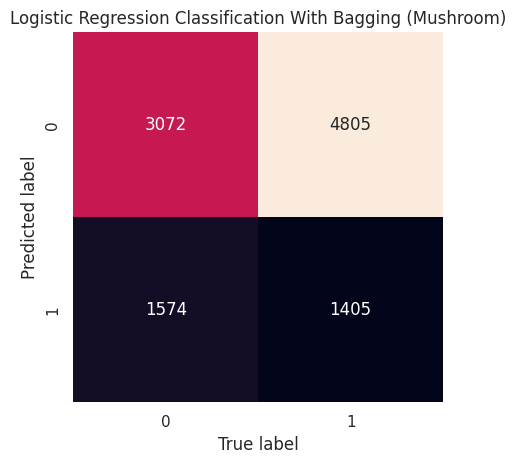

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

##Manual
print("Manual ensembling results: ")
num_models = 100  # Specify the number of decision tree models in the ensemble
models = []

for i in range(num_models):
    # Create a random subset of the training data
    indices = np.random.choice(len(mushroom_prepared_train), size=len(mushroom_prepared_train), replace=True)
    subset_X = mushroom_prepared_train[indices]
    subset_y = mushroom_train_label[indices]

    # Create and fit a decision tree model
    model = LogisticRegression()
    model.fit(subset_X, subset_y)

    # Append the model to the list
    models.append(model)

predictions = np.zeros_like(mushroom_test_label, dtype = float)  # Array to store the aggregated predictions

for model in models:
    model_predictions = model.predict(mushroom_prepared_test)
    predictions += model_predictions

predictions /= num_models  # Take the average of the predictions
predictions = np.where(predictions > 0.5, 1, 0)  # Convert to binary predictions

accuracy = metrics.accuracy_score(mushroom_test_label, predictions)
precision = metrics.precision_score(mushroom_test_label, predictions)
recall = metrics.recall_score(mushroom_test_label, predictions)
f1_score = metrics.f1_score(mushroom_test_label, predictions)

print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1_score: {}".format(f1_score))

# Heatmap
mat = confusion_matrix(mushroom_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Logistic Regression Classification With Manual Ensembling (Mushroom)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()

##Bagging class
print("Bagging Classifier ensembling results: ")
base_model = LogisticRegression()

ensemble_model = BaggingClassifier(base_model, n_estimators=100, random_state=42)

ensemble_model.fit(mushroom_prepared_train, mushroom_train_label)

predictions = ensemble_model.predict(mushroom_prepared_test)

accuracy = metrics.accuracy_score(mushroom_test_label, predictions)
precision = metrics.precision_score(mushroom_test_label, predictions)
recall = metrics.recall_score(mushroom_test_label, predictions)
f1_score = metrics.f1_score(mushroom_test_label, predictions)

print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1_score: {}".format(f1_score))

# Heatmap
mat = confusion_matrix(mushroom_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Logistic Regression Classification With Bagging (Mushroom)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()

######Titanic Dataset

Manual ensembling results: 
accuracy: 0.8044692737430168
precision: 0.7931034482758621
recall: 0.6666666666666666
f1_score: 0.7244094488188977


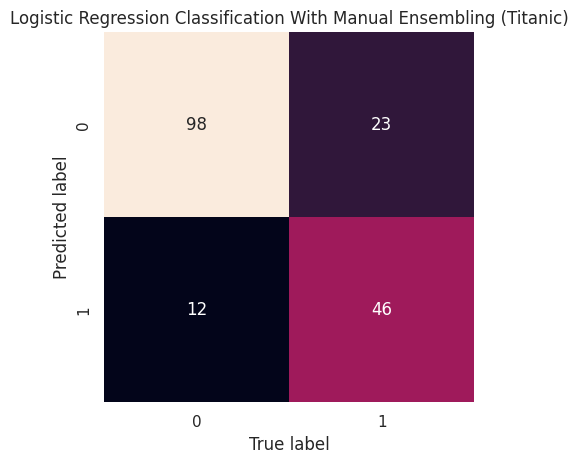

Bagging Classifier ensembling results: 
accuracy: 0.8044692737430168
precision: 0.7931034482758621
recall: 0.6666666666666666
f1_score: 0.7244094488188977


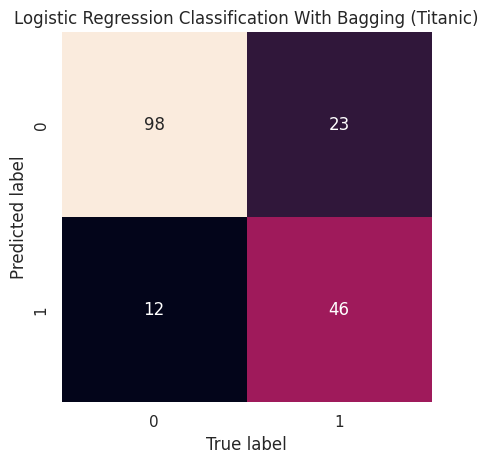

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

##Manual
print("Manual ensembling results: ")
num_models = 100  # Specify the number of decision tree models in the ensemble
models = []

for i in range(num_models):
    # Create a random subset of the training data
    indices = np.random.choice(len(Titanic_prepared_train), size=len(Titanic_prepared_train), replace=True)
    subset_X = Titanic_prepared_train[indices]
    subset_y = Titanic_train_label[indices]

    # Create and fit a decision tree model
    model = LogisticRegression()
    model.fit(subset_X, subset_y)

    # Append the model to the list
    models.append(model)

predictions = np.zeros_like(Titanic_test_label, dtype = float)  # Array to store the aggregated predictions

for model in models:
    model_predictions = model.predict(Titanic_prepared_test)
    predictions += model_predictions

predictions /= num_models  # Take the average of the predictions
predictions = np.where(predictions > 0.5, 1, 0)  # Convert to binary predictions

accuracy = metrics.accuracy_score(Titanic_test_label, predictions)
precision = metrics.precision_score(Titanic_test_label, predictions)
recall = metrics.recall_score(Titanic_test_label, predictions)
f1_score = metrics.f1_score(Titanic_test_label, predictions)

print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1_score: {}".format(f1_score))

# Heatmap
mat = confusion_matrix(Titanic_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Logistic Regression Classification With Manual Ensembling (Titanic)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()

##Bagging class
print("Bagging Classifier ensembling results: ")
base_model = LogisticRegression()

ensemble_model = BaggingClassifier(base_model, n_estimators=100, random_state=42)

ensemble_model.fit(Titanic_prepared_train, Titanic_train_label)

predictions = ensemble_model.predict(Titanic_prepared_test)

accuracy = metrics.accuracy_score(Titanic_test_label, predictions)
precision = metrics.precision_score(Titanic_test_label, predictions)
recall = metrics.recall_score(Titanic_test_label, predictions)
f1_score = metrics.f1_score(Titanic_test_label, predictions)

print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1_score: {}".format(f1_score))

# Heatmap
mat = confusion_matrix(Titanic_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Logistic Regression Classification With Bagging (Titanic)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()

#Decision Tree Model
## No Ensembling

####Mushroom dataset

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
accuracy: 0.5399778924097274
precision: 0.6593291404612159
recall: 0.40515297906602254
f1_score: 0.5018950728106922


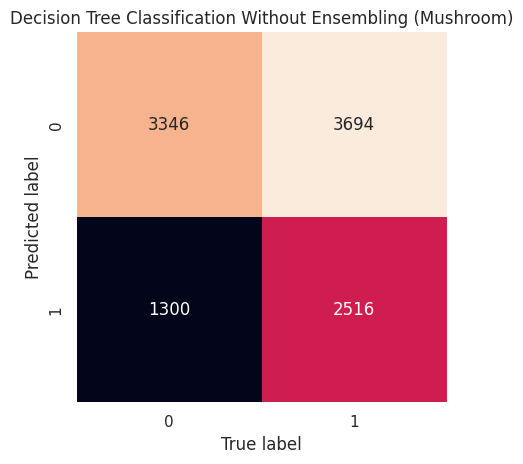

NameError: ignored

<Figure size 5000x4000 with 0 Axes>

In [ ]:
#@title
from sklearn.tree import DecisionTreeClassifier

# initialize and fit model to data
model = DecisionTreeClassifier().fit(mushroom_prepared_train, mushroom_train_label)

#predict
predictions = model.predict(mushroom_prepared_test)
predictions = np.where(predictions > 0.5, 1, 0)

hyperparameters = model.get_params()

# Print the hyperparameters
print(hyperparameters)

#calculate metrics
accuracy = metrics.accuracy_score(mushroom_test_label, predictions)
precision = metrics.precision_score(mushroom_test_label, predictions)
recall = metrics.recall_score(mushroom_test_label, predictions)
f1_score = metrics.f1_score(mushroom_test_label, predictions)
print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1_score: {}".format(f1_score))

# Heatmap
mat = confusion_matrix(mushroom_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Decision Tree Classification Without Ensembling (Mushroom)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()

# Visualization
fig = plt.figure(figsize=(50, 40))
_ = tree.plot_tree(model, max_depth=2);

####Titanic dataset

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
accuracy: 0.8044692737430168
precision: 0.7575757575757576
recall: 0.7246376811594203
f1_score: 0.7407407407407408


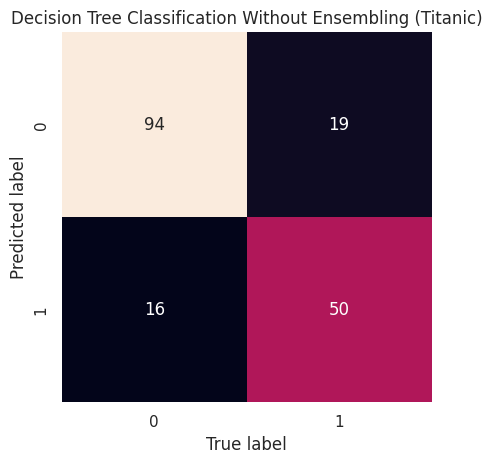

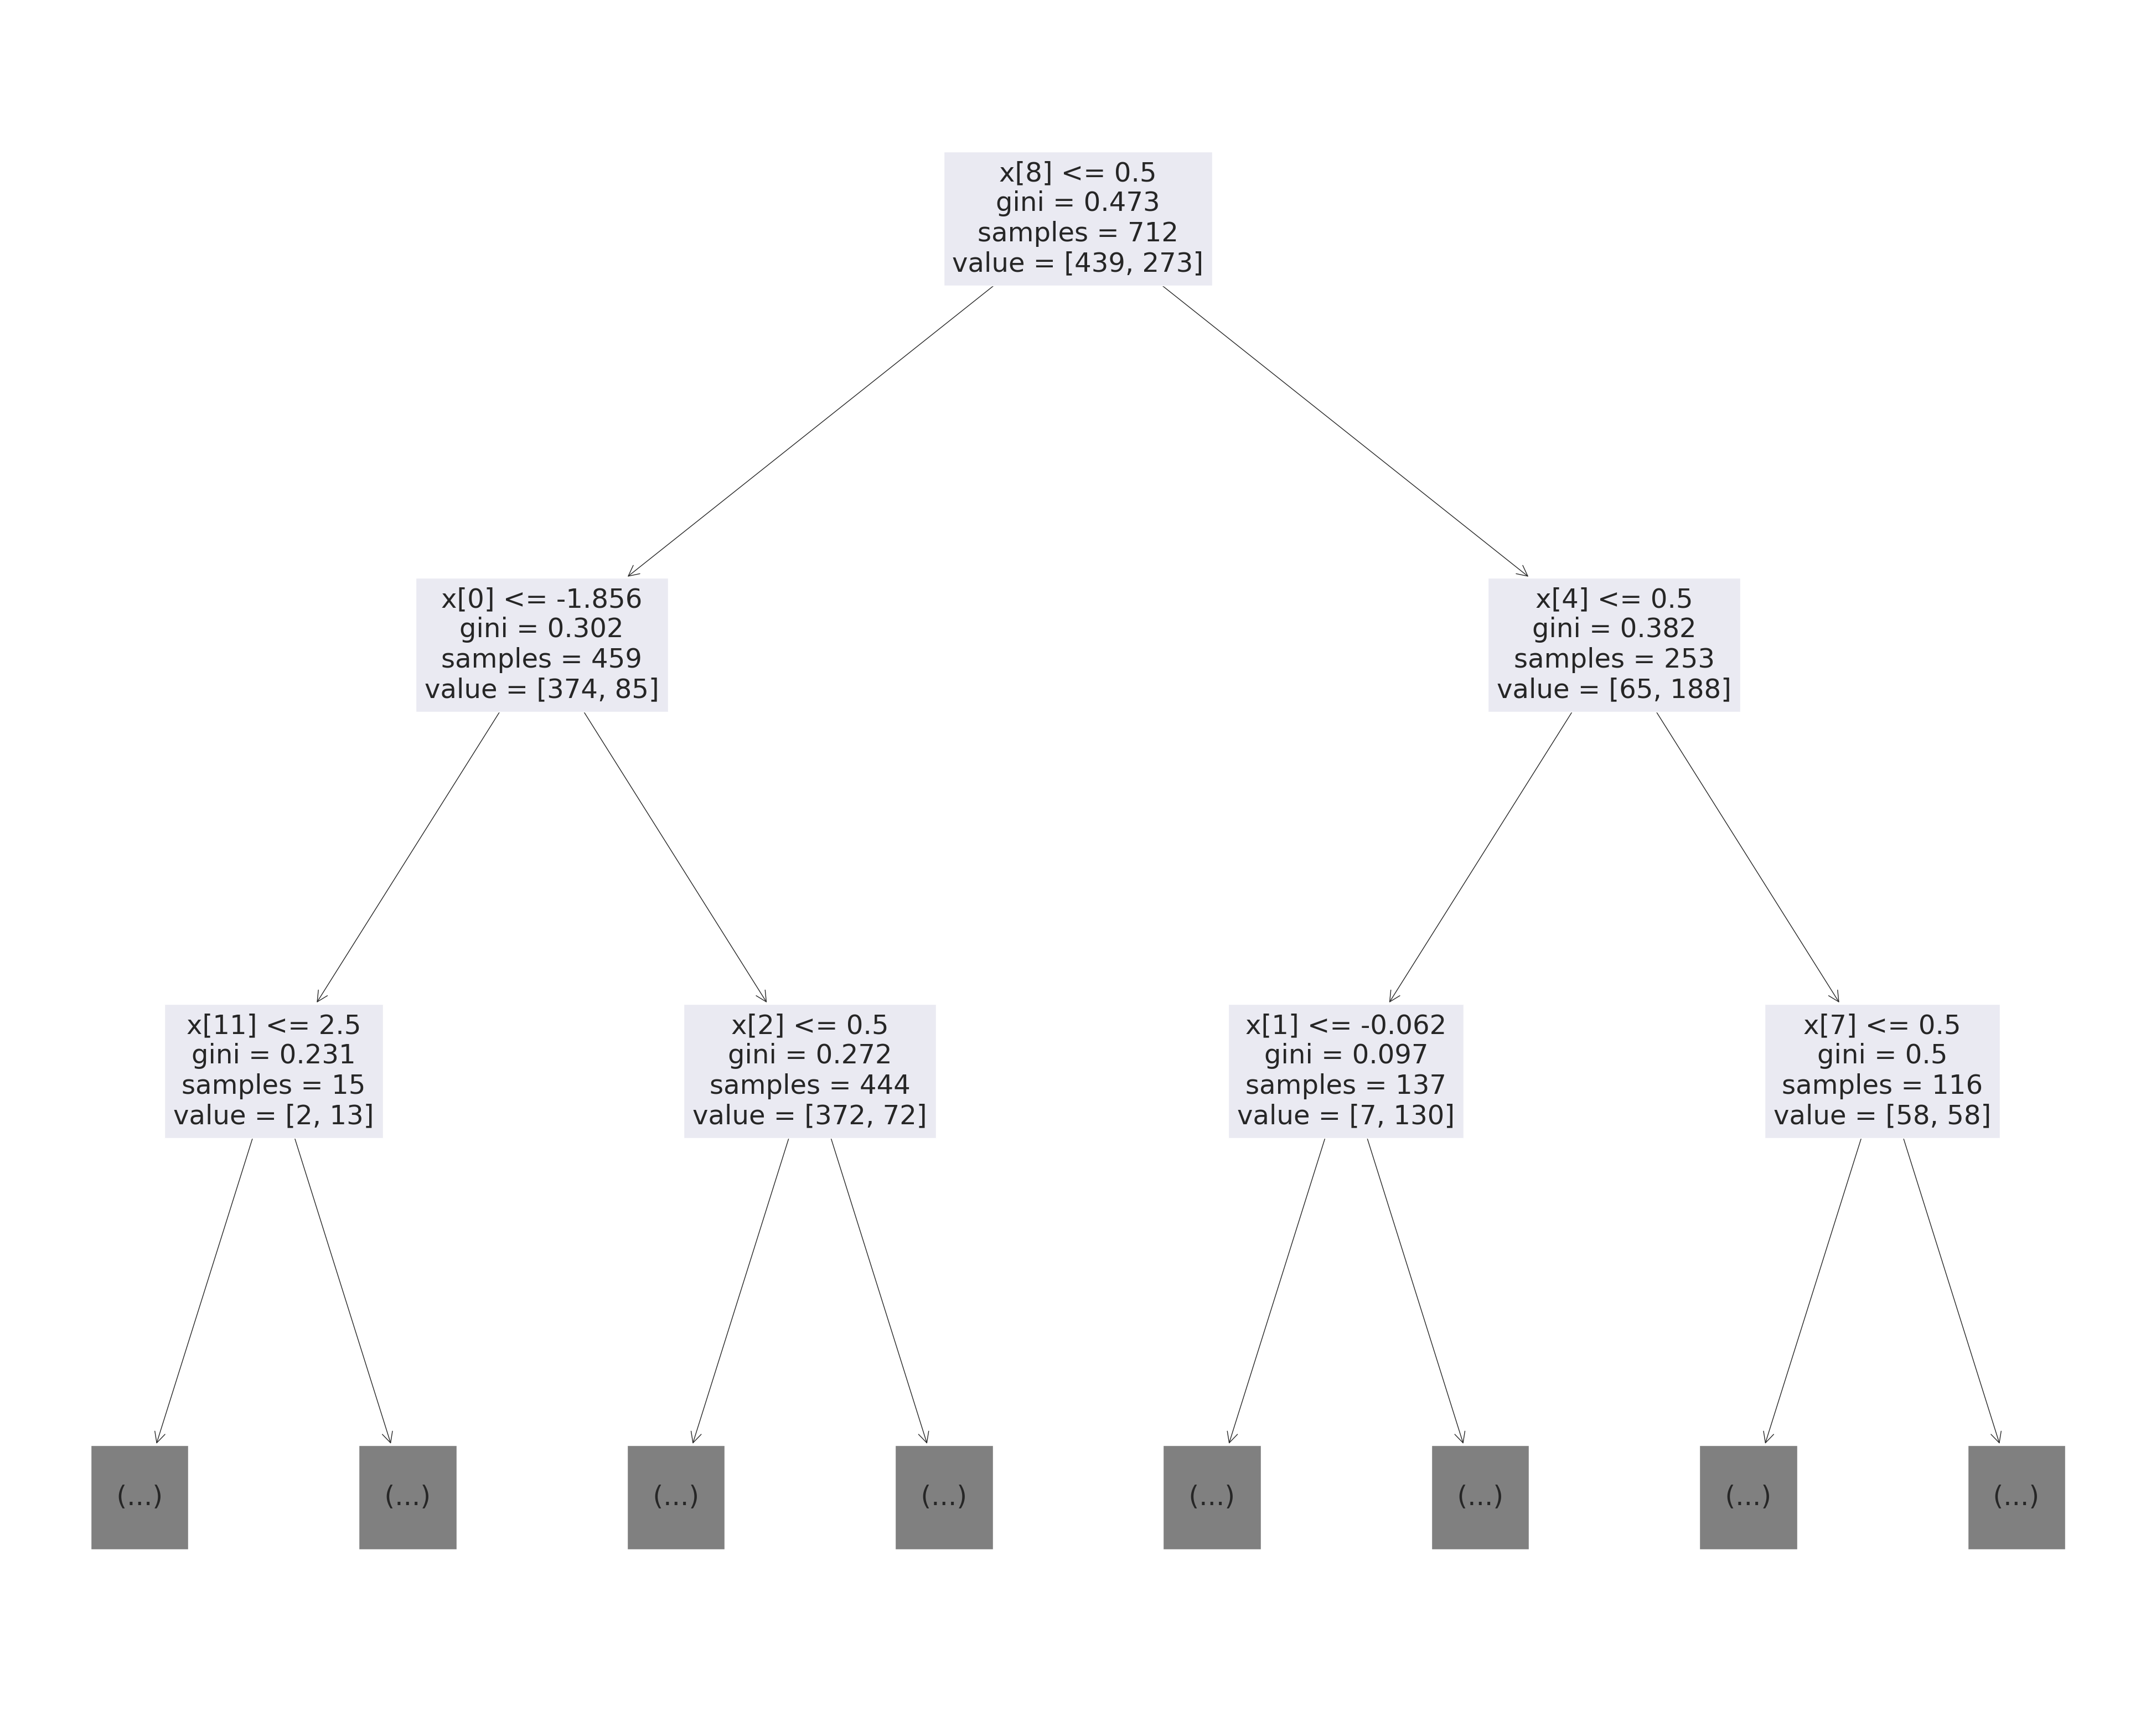

In [ ]:
#@title
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# initialize and fit model to data
model = DecisionTreeClassifier().fit(Titanic_prepared_train, Titanic_train_label)

#predict
predictions = model.predict(Titanic_prepared_test)
predictions = np.where(predictions > 0.5, 1, 0)

hyperparameters = model.get_params()

# Print the hyperparameters
print(hyperparameters)

#calculate metrics
accuracy = metrics.accuracy_score(Titanic_test_label, predictions)
precision = metrics.precision_score(Titanic_test_label, predictions)
recall = metrics.recall_score(Titanic_test_label, predictions)
f1_score = metrics.f1_score(Titanic_test_label, predictions)
print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1_score: {}".format(f1_score))

# Heatmap
mat = confusion_matrix(Titanic_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Decision Tree Classification Without Ensembling (Titanic)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()

# Visualization
fig = plt.figure(figsize=(50, 40))
_ = tree.plot_tree(model, max_depth=2);

##Ensembling

Mushroom dataset

Manual ensembling results: 
accuracy: 0.543201915991157
precision: 0.66327329678935
recall: 0.4091787439613527
f1_score: 0.5061248879593666


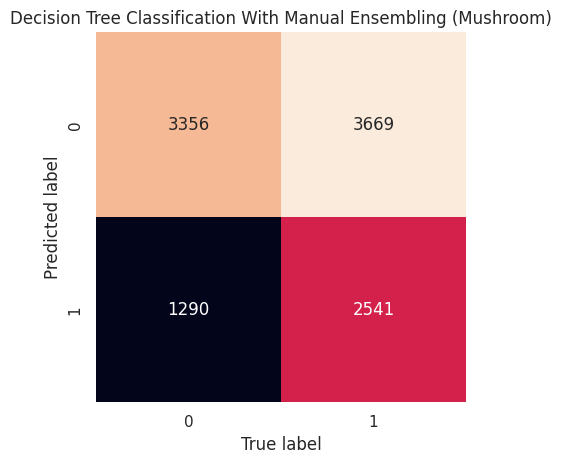

Random Forest ensembling results: 
accuracy: 0.5293846720707442
precision: 0.6955595026642984
recall: 0.31529790660225443
f1_score: 0.4339058171745153


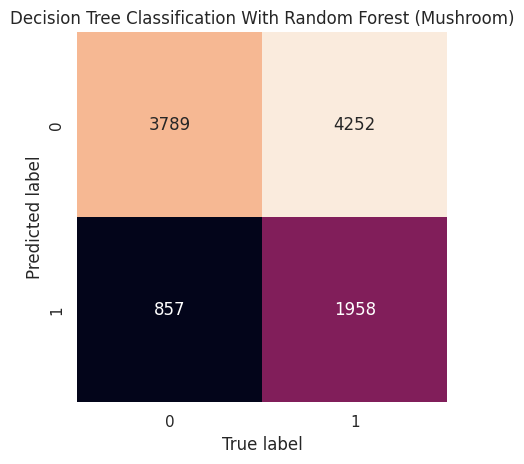

In [ ]:
#@title
##Manual
print("Manual ensembling results: ")

from sklearn.tree import DecisionTreeClassifier
import numpy as np

num_trees = 100  # Specify the number of decision tree models in the ensemble
models = []

for i in range(num_trees):
    # Create a random subset of the training data
    indices = np.random.choice(len(mushroom_prepared_train), size=len(mushroom_prepared_train), replace=True)
    subset_X = mushroom_prepared_train[indices]
    subset_y = mushroom_train_label[indices]

    # Create and fit a decision tree model
    model = DecisionTreeClassifier()
    model.fit(subset_X, subset_y)

    # Append the model to the list
    models.append(model)

predictions = np.zeros_like(mushroom_test_label, dtype = float)  # Array to store the aggregated predictions

for model in models:
    model_predictions = model.predict(mushroom_prepared_test)
    predictions += model_predictions

predictions /= num_trees  # Take the average of the predictions
predictions = np.where(predictions > 0.5, 1, 0)  # Convert to binary predictions

accuracy = metrics.accuracy_score(mushroom_test_label, predictions)
precision = metrics.precision_score(mushroom_test_label, predictions)
recall = metrics.recall_score(mushroom_test_label, predictions)
f1_score = metrics.f1_score(mushroom_test_label, predictions)

print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1_score: {}".format(f1_score))

# Heatmap
mat = confusion_matrix(mushroom_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Decision Tree Classification With Manual Ensembling (Mushroom)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()


##Decision Forest
print("Random Forest ensembling results: ")

# initialize and fit model to data
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier().fit(mushroom_prepared_train, mushroom_train_label)

hyperparameters = model2.get_params()

# Print the hyperparameters
print(hyperparameters)

#predict
predictions = model2.predict(mushroom_prepared_test)
predictions = np.where(predictions > 0.5, 1, 0)

#metrics
accuracy = metrics.accuracy_score(mushroom_test_label, predictions)
precision = metrics.precision_score(mushroom_test_label, predictions)
recall = metrics.recall_score(mushroom_test_label, predictions)
f1_score = metrics.f1_score(mushroom_test_label, predictions)

print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1_score: {}".format(f1_score))

# Heatmap
mat = confusion_matrix(mushroom_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Decision Tree Classification With Random Forest (Mushroom)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()

Titanic dataset

Manual ensembling results: 
accuracy: 0.8100558659217877
precision: 0.7777777777777778
recall: 0.7101449275362319
f1_score: 0.7424242424242424


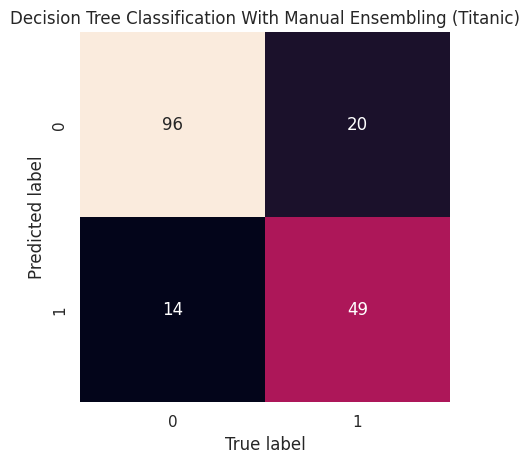

Random Forest ensembling results: 
accuracy: 0.7988826815642458
precision: 0.7704918032786885
recall: 0.6811594202898551
f1_score: 0.7230769230769231


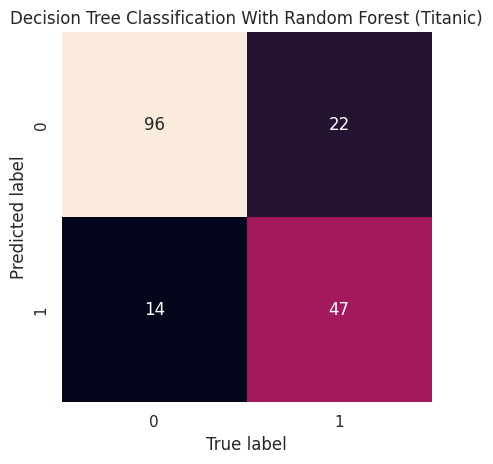

In [ ]:
#@title
##Manual
print("Manual ensembling results: ")

from sklearn.tree import DecisionTreeClassifier
import numpy as np

num_trees = 100  # Specify the number of decision tree models in the ensemble
models = []

for i in range(num_trees):
    # Create a random subset of the training data
    indices = np.random.choice(len(Titanic_prepared_train), size=len(Titanic_prepared_train), replace=True)
    subset_X = Titanic_prepared_train[indices]
    subset_y = Titanic_train_label[indices]

    # Create and fit a decision tree model
    model = DecisionTreeClassifier()
    model.fit(subset_X, subset_y)

    # Append the model to the list
    models.append(model)

predictions = np.zeros_like(Titanic_test_label, dtype = float)  # Array to store the aggregated predictions

for model in models:
    model_predictions = model.predict(Titanic_prepared_test)
    predictions += model_predictions

predictions /= num_trees  # Take the average of the predictions
predictions = np.where(predictions > 0.5, 1, 0)  # Convert to binary predictions

accuracy = metrics.accuracy_score(Titanic_test_label, predictions)
precision = metrics.precision_score(Titanic_test_label, predictions)
recall = metrics.recall_score(Titanic_test_label, predictions)
f1_score = metrics.f1_score(Titanic_test_label, predictions)

print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1_score: {}".format(f1_score))

# Heatmap
mat = confusion_matrix(Titanic_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Decision Tree Classification With Manual Ensembling (Titanic)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()



##Decision Forest
print("Random Forest ensembling results: ")

from sklearn.ensemble import RandomForestClassifier

# initialize and fit model to data
model2 = RandomForestClassifier().fit(Titanic_prepared_train, Titanic_train_label)

#predict
predictions = model2.predict(Titanic_prepared_test)
predictions = np.where(predictions > 0.5, 1, 0)

#calculate metrics
accuracy = metrics.accuracy_score(Titanic_test_label, predictions)
precision = metrics.precision_score(Titanic_test_label, predictions)
recall = metrics.recall_score(Titanic_test_label, predictions)
f1_score = metrics.f1_score(Titanic_test_label, predictions)
print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1_score: {}".format(f1_score))

# Heatmap
mat = confusion_matrix(Titanic_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Decision Tree Classification With Random Forest (Titanic)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()

# KNN Model

## No Ensembling

### Mushroom Dataset

Best hyperparameters: {'leaf_size': 1, 'n_neighbors': 30}
accuracy: 0.5565585851142225
precision: 0.6531373409390083
recall: 0.4793880837359098
f1_score: 0.5529346210995543


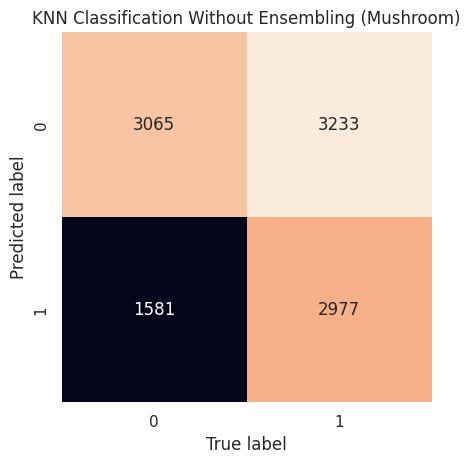

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameters
n_neighbors = [1] + list(range(5, 31, 5))
leaf_size = [1] + list(range(5, 51, 5))
hyperparameters = dict(n_neighbors=n_neighbors, leaf_size=leaf_size)

## Optimize the hyperparameters
knn = KNeighborsClassifier()
gs_knn = GridSearchCV(estimator=knn, param_grid=hyperparameters, scoring="accuracy")
gs_knn.fit(mushroom_prepared_train, mushroom_train_label)

## Print the best hyperparameters
print(f'Best hyperparameters: {gs_knn.best_params_}')

## Calculate the scores
predictions = gs_knn.predict(mushroom_prepared_test)
accuracy = metrics.accuracy_score(mushroom_test_label, predictions)
precision = metrics.precision_score(mushroom_test_label, predictions)
recall = metrics.recall_score(mushroom_test_label, predictions)
f1_score = metrics.f1_score(mushroom_test_label, predictions)

# Print the scores
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1_score: {f1_score}")

# Heatmap
mat = confusion_matrix(mushroom_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('KNN Classification Without Ensembling (Mushroom)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()

### Titanic Dataset

Best hyperparameters: {'leaf_size': 40, 'n_neighbors': 30}
accuracy: 0.7821229050279329
precision: 0.7777777777777778
recall: 0.6086956521739131
f1_score: 0.6829268292682927


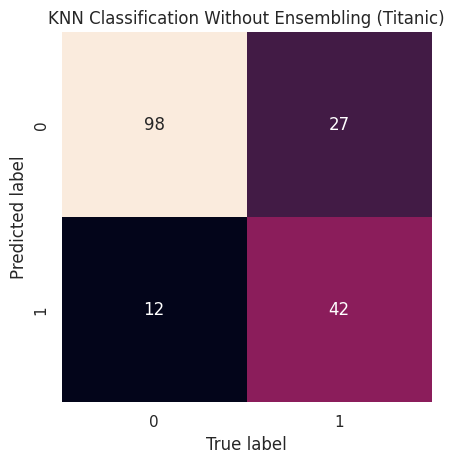

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_decision_regions

# Hyperparameters
n_neighbors = [1] + list(range(5, 31, 5))
leaf_size = [1] + list(range(5, 51, 5))
hyperparameters = dict(n_neighbors=n_neighbors, leaf_size=leaf_size)

## Optimize the hyperparameters
knn = KNeighborsClassifier()
gs_knn = GridSearchCV(estimator=knn, param_grid=hyperparameters, scoring="accuracy")
gs_knn.fit(Titanic_prepared_train, Titanic_train_label)

## Print the best hyperparameters
print(f'Best hyperparameters: {gs_knn.best_params_}')

## Calculate the scores
predictions = gs_knn.predict(Titanic_prepared_test)
accuracy = metrics.accuracy_score(Titanic_test_label, predictions)
precision = metrics.precision_score(Titanic_test_label, predictions)
recall = metrics.recall_score(Titanic_test_label, predictions)
f1_score = metrics.f1_score(Titanic_test_label, predictions)

# Print the scores
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1_score: {f1_score}")

# # Visualization
# def setall(d, keys, value):
#     for k in keys:
#         d[k] = value
# value = 1.5
# width = 0.75
# values = {}
# widths = {}
# setall(values, range(0,8), value)
# setall(values, range(10,17), value)
# setall(widths, range(0,8), width)
# setall(widths, range(10,17), width)
# plot_decision_regions(Titanic_prepared_train, Titanic_train_label, feature_index=[8, 9],
#                       filler_feature_values=values, filler_feature_ranges=widths,
#                       clf=gs_knn, legend=2)
plt.show()

# Heatmap
mat = confusion_matrix(Titanic_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('KNN Classification Without Ensembling (Titanic)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()

## Ensembling

### Mushroom Dataset

accuracy: 0.5843773028739867
precision: 0.6946354883081155
recall: 0.48792270531400966
f1_score: 0.5732122587968218


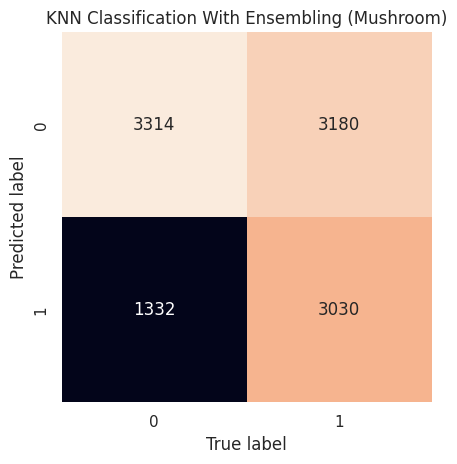

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# Ensemble
estimators = []
for i in range(200):
  estimators.append((f'KNN{i}', KNeighborsClassifier(n_neighbors = np.random.randint(1, 31), leaf_size = np.random.randint(1, 51))))
vc = VotingClassifier(estimators=estimators, voting='hard')
vc.fit(mushroom_prepared_train, mushroom_train_label)

# Calculate the scores
predictions = vc.predict(mushroom_prepared_test)
accuracy = metrics.accuracy_score(mushroom_test_label, predictions)
precision = metrics.precision_score(mushroom_test_label, predictions)
recall = metrics.recall_score(mushroom_test_label, predictions)
f1_score = metrics.f1_score(mushroom_test_label, predictions)

# Print the scores
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1_score: {f1_score}")

# Heatmap
mat = confusion_matrix(mushroom_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('KNN Classification With Ensembling (Mushroom)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()

### Titanic Dataset

accuracy: 0.8044692737430168
precision: 0.8035714285714286
recall: 0.6521739130434783
f1_score: 0.7200000000000001


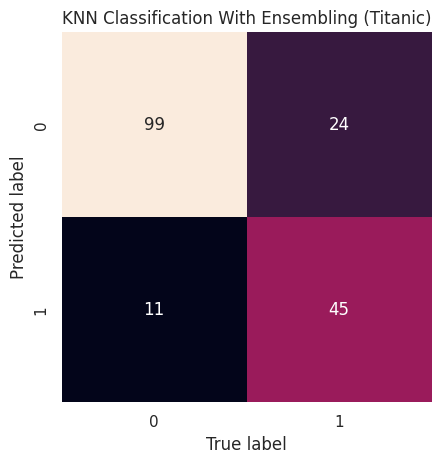

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# Ensemble
estimators = []
for i in range(200):
  estimators.append((f'KNN{i}', KNeighborsClassifier(n_neighbors = np.random.randint(1, 31), leaf_size = np.random.randint(1, 51))))
vc = VotingClassifier(estimators=estimators, voting='hard')
vc.fit(Titanic_prepared_train, Titanic_train_label)

# Calculate the scores
predictions = vc.predict(Titanic_prepared_test)
accuracy = metrics.accuracy_score(Titanic_test_label, predictions)
precision = metrics.precision_score(Titanic_test_label, predictions)
recall = metrics.recall_score(Titanic_test_label, predictions)
f1_score = metrics.f1_score(Titanic_test_label, predictions)

# Print the scores
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"f1_score: {f1_score}")

# Heatmap
mat = confusion_matrix(Titanic_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('KNN Classification With Ensembling (Titanic)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()

#SVM Model

##No ensembling

####Mushroom Dataset

accuracy: 0.5817059690493737
precision: 0.6932160222273674
recall: 0.4821256038647343
f1_score: 0.5687149776806915


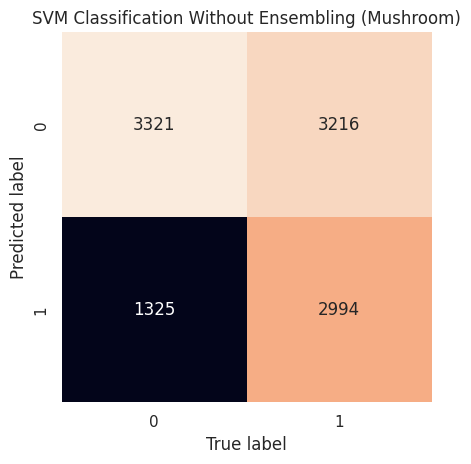

In [ ]:
from sklearn import svm

# initialize and fit model to data
model = svm.SVC().fit(mushroom_prepared_train, mushroom_train_label)

#predict
predictions = model.predict(mushroom_prepared_test)

#calculate metrics
accuracy = metrics.accuracy_score(mushroom_test_label, predictions)
precision = metrics.precision_score(mushroom_test_label, predictions)
recall = metrics.recall_score(mushroom_test_label, predictions)
f1_score = metrics.f1_score(mushroom_test_label, predictions)
print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1_score: {}".format(f1_score))

# Heatmap
mat = confusion_matrix(mushroom_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('SVM Classification Without Ensembling (Mushroom)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()

####Titanic dataset

accuracy: 0.8156424581005587
precision: 0.8333333333333334
recall: 0.6521739130434783
f1_score: 0.7317073170731708


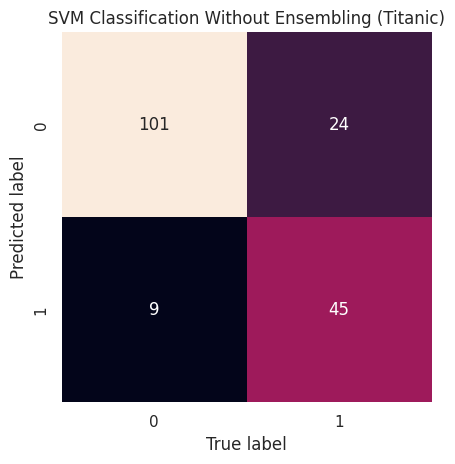

In [ ]:
from sklearn import svm

# initialize and fit model to data
model = svm.SVC().fit(Titanic_prepared_train, Titanic_train_label)

#predict
predictions = model.predict(Titanic_prepared_test)

#calculate metrics
accuracy = metrics.accuracy_score(Titanic_test_label, predictions)
precision = metrics.precision_score(Titanic_test_label, predictions)
recall = metrics.recall_score(Titanic_test_label, predictions)
f1_score = metrics.f1_score(Titanic_test_label, predictions)
print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1_score: {}".format(f1_score))

# Heatmap
mat = confusion_matrix(Titanic_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('SVM Classification Without Ensembling (Titanic)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()

##Ensembling

####Mushroom Dataset

Bagging Classifier ensembling results: 
accuracy: 0.5817059690493737
precision: 0.6837700946927989
recall: 0.5
f1_score: 0.5776206864477723


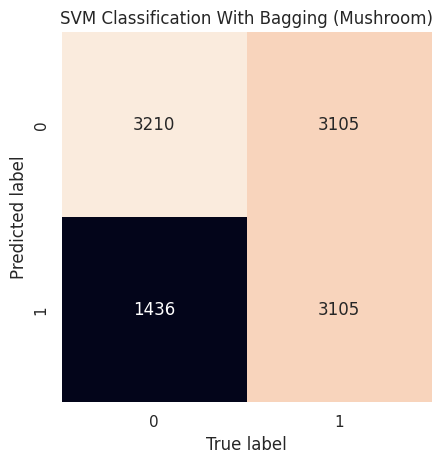

In [ ]:
from sklearn import svm
from sklearn.ensemble import BaggingClassifier, VotingClassifier

'''
##Stacking (Unable to train in reasonable time due to large dataset and kernel='poly')
print("Stacking Classifier ensembling results: ")
svm_model_1 = svm.SVC(kernel='rbf', probability=False)
svm_model_2 = svm.SVC(kernel='linear', C=0.5, probability=False)
svm_model_3 = svm.SVC(kernel='poly', degree=2, C=0.8, probability=False)

ensemble_model = VotingClassifier(estimators=[
    ('svm1', svm_model_1),
    ('svm2', svm_model_2),
    ('svm3', svm_model_3)
], voting='hard', n_jobs=-1)

ensemble_model.fit(mushroom_prepared_train, mushroom_train_label)

predictions = ensemble_model.predict(mushroom_prepared_test)

accuracy = metrics.accuracy_score(mushroom_test_label, predictions)
precision = metrics.precision_score(mushroom_test_label, predictions)
recall = metrics.recall_score(mushroom_test_label, predictions)
f1_score = metrics.f1_score(mushroom_test_label, predictions)

print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1_score: {}".format(f1_score))
'''

##Bagging class (~15 min train time)
print("Bagging Classifier ensembling results: ")
base_model = svm.SVC(C=0.5)

ensemble_model = BaggingClassifier(base_model, n_estimators=80, max_samples=0.2, n_jobs=-1, random_state=42)

ensemble_model.fit(mushroom_prepared_train, mushroom_train_label)

predictions = ensemble_model.predict(mushroom_prepared_test)

accuracy = metrics.accuracy_score(mushroom_test_label, predictions)
precision = metrics.precision_score(mushroom_test_label, predictions)
recall = metrics.recall_score(mushroom_test_label, predictions)
f1_score = metrics.f1_score(mushroom_test_label, predictions)

print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1_score: {}".format(f1_score))

# Heatmap
mat = confusion_matrix(mushroom_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('SVM Classification With Bagging (Mushroom)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()

####Titanic Dataset

Bagging Classifier ensembling results: 
accuracy: 0.8268156424581006
precision: 0.8166666666666667
recall: 0.7101449275362319
f1_score: 0.7596899224806202


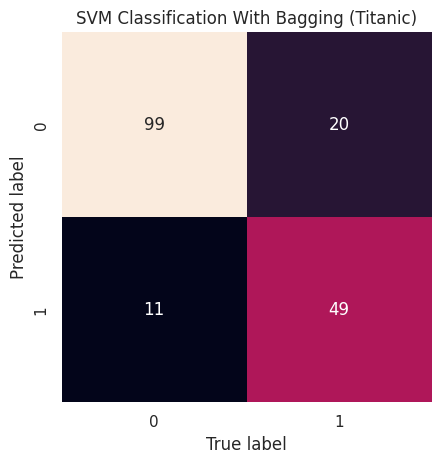

Voting Classifier ensembling results: 
accuracy: 0.8212290502793296
precision: 0.8363636363636363
recall: 0.6666666666666666
f1_score: 0.7419354838709676


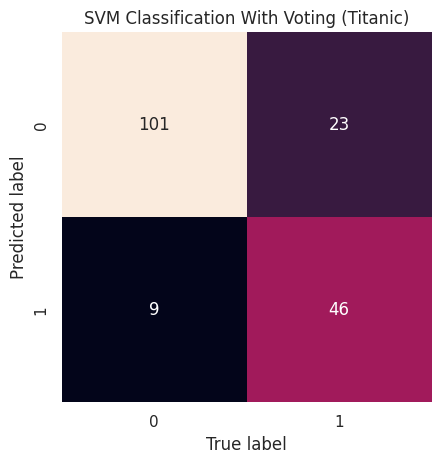

In [ ]:
from sklearn import svm
from sklearn.ensemble import BaggingClassifier, VotingClassifier

##Bagging class
print("Bagging Classifier ensembling results: ")
base_model = svm.SVC()

ensemble_model = BaggingClassifier(base_model, n_estimators=100, max_samples=0.5, random_state=42)

ensemble_model.fit(Titanic_prepared_train, Titanic_train_label)

predictions = ensemble_model.predict(Titanic_prepared_test)

accuracy = metrics.accuracy_score(Titanic_test_label, predictions)
precision = metrics.precision_score(Titanic_test_label, predictions)
recall = metrics.recall_score(Titanic_test_label, predictions)
f1_score = metrics.f1_score(Titanic_test_label, predictions)

print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1_score: {}".format(f1_score))

# Heatmap
mat = confusion_matrix(Titanic_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('SVM Classification With Bagging (Titanic)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()

##Stacking
print("Voting Classifier ensembling results: ")
svm_model_1 = svm.SVC(kernel='rbf', probability=True)
svm_model_2 = svm.SVC(kernel='linear', C=0.5, probability=True)
svm_model_3 = svm.SVC(kernel='poly', degree=2, C=0.8, probability=True)

ensemble_model = VotingClassifier(estimators=[
    ('svm1', svm_model_1),
    ('svm2', svm_model_2),
    ('svm3', svm_model_3),
], voting='soft')

ensemble_model.fit(Titanic_prepared_train, Titanic_train_label)

predictions = ensemble_model.predict(Titanic_prepared_test)

accuracy = metrics.accuracy_score(Titanic_test_label, predictions)
precision = metrics.precision_score(Titanic_test_label, predictions)
recall = metrics.recall_score(Titanic_test_label, predictions)
f1_score = metrics.f1_score(Titanic_test_label, predictions)

print("accuracy: {}".format(accuracy))
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("f1_score: {}".format(f1_score))

# Heatmap
mat = confusion_matrix(Titanic_test_label, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('SVM Classification With Voting (Titanic)')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.tight_layout()
plt.show()